In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split

# Test Estadísticos de Normalidad

Cuando trabajamos con datos, una de las suposiciones más comunes es que estos siguen una distribución **normal** (es decir, una forma de campana). Esto es importante porque muchas pruebas estadísticas, como las pruebas t, dependen de que los datos sigan una distribución normal.

### ¿Qué es un Test de Normalidad?

Un **test de normalidad** es una prueba que nos ayuda a determinar si nuestros datos siguen o no una distribución normal. Esto es importante, ya que si los datos no son normales, algunas pruebas estadísticas pueden no ser válidas. Si los datos son normales, podemos usar ciertas pruebas con más confianza.

### Casos de Uso en la Vida Real:
- **Test de Normalidad en una Encuesta**: Imagina que has realizado una encuesta sobre el tiempo que las personas pasan navegando por internet y quieres saber si los tiempos siguen una distribución normal para poder aplicar un test estadístico.
- **Evaluación de Resultados de una Prueba**: Si tienes los resultados de un examen y quieres saber si esos resultados siguen una distribución normal, para ver si puedes usar una prueba t para compararlos con otros grupos.

### ¿Cómo saber si los datos son normales?

Existen varias formas de comprobar si los datos siguen una distribución normal. Aquí te mostramos dos de los test más comunes:

1. **Test de Shapiro-Wilk**: Es uno de los test más utilizados para comprobar la normalidad en pequeños y medianos conjuntos de datos.
2. **Test de Anderson-Darling**: Otro test muy popular que se utiliza para detectar desviaciones de la normalidad.



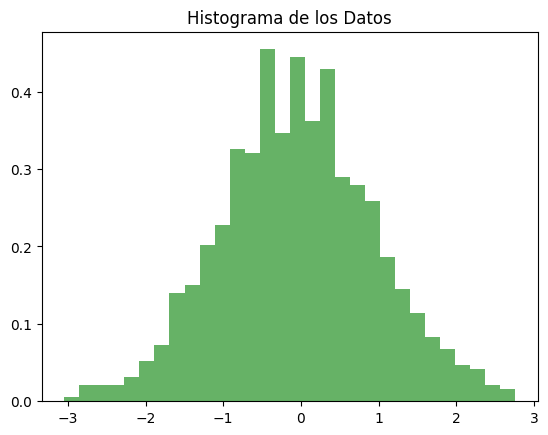

Shapiro-Wilk Test: Estadístico = 0.9986, p-valor = 0.5912


In [4]:
# Generamos algunos datos de ejemplo (distribución normal)
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Visualizamos los datos
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma de los Datos')
plt.show()

# Test de Shapiro-Wilk
stat, p_value_shapiro = stats.shapiro(data)
print(f"Shapiro-Wilk Test: Estadístico = {stat:.4f}, p-valor = {p_value_shapiro:.4f}")


# **Ejercicio: Prueba A/B para Evaluar la Tasa de Conversión en una Página Web**

## **Contexto**
Una empresa de comercio electrónico quiere probar si cambiar el color del botón "Comprar Ahora" en su página web de azul a verde mejora la tasa de conversión de los usuarios. Para ello, se llevará a cabo una prueba A/B.

### **Pasos del Ejercicio**

1. **Explorar los datos.**

2. **Definir el Indicador Clave a Evaluar.**

3. **Definir la Hipótesis Estadística.**

5. **Definir el Tamaño de Muestra.**

6. **Definir el Método de Muestreo.**

7. **Definir distribución de los datos.**

8. **Seleccionar la Prueba Estadística:**

9. **Interpretar la Prueba Estadística:**
   - Si el p-valor es menor que 0.05, se rechaza H₀ y se concluye que el color del botón afecta la tasa de conversión.


In [5]:
# Generar los datos
# Paso 1: Simular datos
np.random.seed(42)
n_users = 5000

# Fechas aleatorias dentro de un rango de 30 días
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(days=np.random.randint(0, 30)) for _ in range(n_users)]

# Generamos identificadores únicos de usuario y de visita
usuario_ids = np.random.randint(1000, 9999, n_users)
id_visitas = np.random.randint(100000, 999999, n_users)

# Asignamos usuarios aleatoriamente a los grupos
conversion_rates = {"azul": (0.12, 0.02), "verde": (0.14, 0.02)}

# Simulación de conversiones con distribución normal
grupo = np.random.choice(["azul", "verde"], size=n_users)
datos_conversion = [
    np.random.normal(loc=conversion_rates[color][0], scale=conversion_rates[color][1]) > 0.12
    for color in grupo
]

# Crear el DataFrame

df = pd.DataFrame({
    "usuario_id": usuario_ids,
    "fecha_visita": dates,
    "id_visita": id_visitas,
    "hizo_clic": datos_conversion
})

df

,usuario_id,fecha_visita,id_visita,hizo_clic
0,5424,2024-01-07,818515,True
1,4237,2024-01-20,932230,True
2,4893,2024-01-29,177271,True
3,3005,2024-01-15,916609,True
4,3016,2024-01-11,589464,True
...,...,...,...,...
4995,1886,2024-01-13,771162,False
4996,6854,2024-01-04,593844,True
4997,6318,2024-01-02,666695,False
4998,3258,2024-01-16,220283,True


In [6]:
df['usuario_id'].value_counts().sort_values()

usuario_id
6442    1
4907    1
1807    1
5827    1
3284    1
       ..
3513    4
4406    5
1615    5
5920    5
2907    5
Name: count, Length: 3839, dtype: int64

In [7]:
df.sample(1000)

,usuario_id,fecha_visita,id_visita,hizo_clic
2361,3706,2024-01-06,951481,True
314,3120,2024-01-06,583791,True
4757,6902,2024-01-15,332275,True
3072,2101,2024-01-12,629983,True
282,3708,2024-01-23,145708,True
...,...,...,...,...
2906,1880,2024-01-04,484474,True
1713,8833,2024-01-21,356216,True
4851,5670,2024-01-19,359291,False
3352,6988,2024-01-18,273217,True


<Axes: xlabel='fecha_visita'>

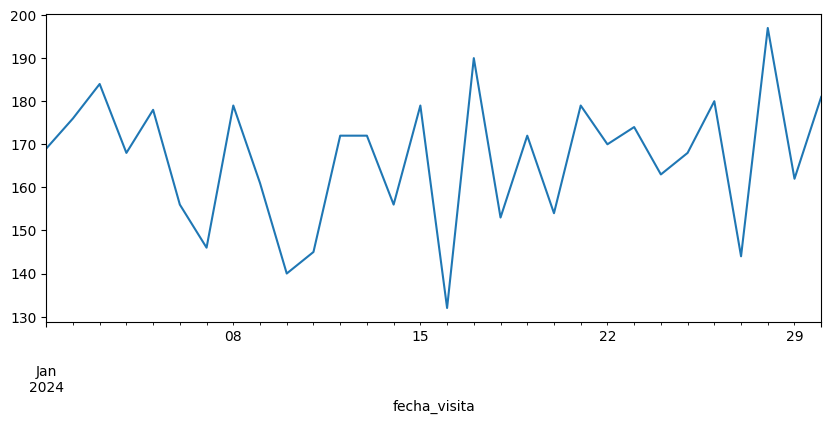

In [8]:
df.groupby('fecha_visita')['id_visita'].count().plot(kind='line',figsize=(10,4))

In [9]:
- 1920

- 1571



-1571

In [10]:
df['usuario_id'].nunique()

3839

In [11]:
conteo = df["usuario_id"].value_counts()
unicos = conteo[conteo==1].index
# unicos.shape
# df_usuario_unico = df[df['usuario_id'].isin(unicos)]
# print(df_usuario_unico.info())

## Mi Prueba

1) Exploramos los datos, se necesita calcular la conversion diaria, para esto necesitamos la taza de conversion de los usuarios diaria.

In [12]:
df.head()

,usuario_id,fecha_visita,id_visita,hizo_clic
0,5424,2024-01-07,818515,True
1,4237,2024-01-20,932230,True
2,4893,2024-01-29,177271,True
3,3005,2024-01-15,916609,True
4,3016,2024-01-11,589464,True


Siempre que tengamos una columna de tiempo vale la pena ver la duración. Y ver como evolucionan las variables claves a traves del tiempo.

<Axes: xlabel='fecha_visita'>

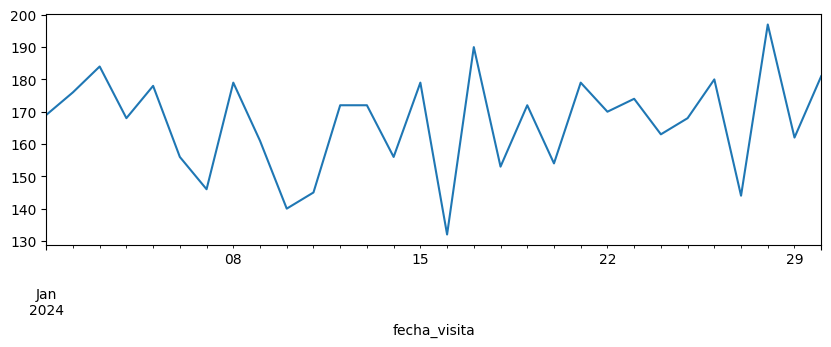

In [13]:
df.groupby('fecha_visita')['id_visita'].count().plot(kind='line', figsize=(10,3))

Usaremos una hipotesis de una cola, hipotesis alterna es que el boton verde mejora la tasa de conversion.

In [14]:
#4. Definir tamaño de muestra
alpha = 0.05  # Nivel de significancia
power = 0.8  # Potencia estadística
effect_size = 0.1  # Diferencia mínima detectable
sample_size = TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)
sample_size = int(np.ceil(sample_size))
sample_size

1571

In [15]:
df['usuario_id'].nunique()

3839

Tenemos 1920 como la mitad de valores unicos, y tenemos 1571 como el minimo necesario. En este caso es recomendable usar 1571 de sample por que seria mas economico hacer las pruebas, debido a que este numero representar muy bien el comportamiento de una población.

In [30]:
df_users = df[['usuario_id']].drop_duplicates()

# Le doy test_size entre 2
users_control , users_treatment = train_test_split(
    df_users, 
    test_size=1571, 
    random_state=0)

# treatment tiene 1571 pero users control tiene el resto, asi que usamos sample
users_control = users_control.sample(n=1571)

# Filtro mi df control y mi df tratamiento

control = df[df['usuario_id'].isin(users_control['usuario_id'])]
treatment = df[df['usuario_id'].isin(users_treatment['usuario_id'])]


In [31]:
# Verifico el tamano de mi muestra
display(
    users_control.shape,
    users_treatment.shape
)

(1571, 1)

(1571, 1)

In [36]:
control.head()

,usuario_id,fecha_visita,id_visita,hizo_clic
3,3005,2024-01-15,916609,True
6,9353,2024-01-29,615631,False
7,4976,2024-01-21,444359,False
12,7469,2024-01-11,541144,True
16,6184,2024-01-04,723578,True


In [ ]:
# Sigue generar la tasa de conversion diaria

control_agg = control.groupby('fecha_visita').agg(
    visitas = ('id_visita', 'count'),
    clicks = ('hizo_clic', 'sum')
).reset_index()

# Se genera la columna de tasa de conversion
control_agg['tasa_conversion'] = control_agg['clicks'] / control_agg['visitas']

treatment_agg = treatment.groupby('fecha_visita').agg(
    visitas = ('id_visita', 'count'),
    clicks = ('hizo_clic', 'sum')
).reset_index()

treatment_agg['tasa_conversion'] = treatment_agg['clicks'] / treatment_agg['visitas']

In [48]:
# Veamos si siguen o no siguen una distribución normal

# Podemos usar el test de Shapiro Wilk, la hipotesis nula es que se sigue una distribucion normal, la alterna es que no se sgue una distribucion normal

alpha = 0.05

stat1, pvalue_control = stats.shapiro(control_agg['tasa_conversion'])
stat2, pvalue_treatment = stats.shapiro(treatment_agg['tasa_conversion'])

print(f"Shapiro-Wilk para Grupo 1: p-value = {pvalue_control:.4f}")
print(f"Shapiro-Wilk para Grupo 2: p-value = {pvalue_treatment:.4f}")

if pvalue_control > alpha:
    print('La muestra de control es normal')
else:
    print('La muestra de control no es normal')

if pvalue_treatment > alpha:
    print('La muestra de tratamiento es normal')
else:
    print('La muestra de tratamiento no es normal')

Shapiro-Wilk para Grupo 1: p-value = 0.5266
Shapiro-Wilk para Grupo 2: p-value = 0.4841
La muestra de control es normal
La muestra de tratamiento es normal


Ambos valores son mayores a alpha = 0.05 esto quiere decir que ambos tienen una distribución normal, por ende podemos usar la prueba de TStudent.

In [49]:
if pvalue_control > alpha and pvalue_treatment > alpha:
    # Si ambos son normales, usamos t-Student
    t_stat, p_value = stats.ttest_ind(control_agg['tasa_conversion'], treatment_agg['tasa_conversion'])
    print(f"t-Student: p-valor = {p_value/2:.4f}")
else:
    # Si alguno no es normal, usamos Mann-Whitney
    mw_stat, p_value = stats.mannwhitneyu(control_agg['tasa_conversion'], treatment_agg['tasa_conversion'])
    print(f"Mann-Whitney U: p-valor = {p_value/2:.4f}")


if (p_value / 2 < alpha) and (treatment_agg['tasa_conversion'].mean() > control_agg['tasa_conversion'].mean()):
  print('Rechazamos la hipotesis nula: El verde mejora la tasa de conversión.')
else:
  print('No rechazamos la hipotesis nula: La tasa de conversión del verde es menor o igual a la del azul.')

t-Student: p-valor = 0.2089
No rechazamos la hipotesis nula: La tasa de conversión del verde es menor o igual a la del azul.


# Solución

In [ ]:
#2. Indicador clave: Tasa de conversión diaria.

In [ ]:
#3.
# **Hipótesis nula (H₀):** La tasa de conversión del botón verde es menor o igual al botón azul.
# **Hipótesis alternativa (H₁):** La tasa de conversión del botón verde es mayor al botón azul.

## 📊 Cómo funciona `solve_power` de `TTestIndPower` en Python

El método `solve_power()` de la clase `TTestIndPower` se usa para calcular uno de los cuatro elementos clave en una prueba t de dos muestras independientes: **tamaño del efecto (`effect_size`), nivel de significancia (`alpha`), potencia estadística (`power`) o tamaño de muestra**, con base en los otros tres.

---

### 🔍 Parámetros importantes

#### 1. `effect_size`
Representa la magnitud de la diferencia que esperamos detectar entre los dos grupos. Valores de referencia comunes:
- 0.2 → efecto pequeño
- 0.5 → efecto mediano
- 0.8 → efecto grande

Este valor debe basarse en estudios anteriores, experiencia del dominio o una estimación razonable de lo que se considera una diferencia relevante.

#### 2. `alpha`
Es el **nivel de significancia**, o la probabilidad de cometer un **error tipo I**: rechazar la hipótesis nula cuando en realidad es verdadera.

- Valor común: `alpha = 0.05`, es decir, aceptamos un 5% de riesgo de falso positivo.

Este valor define qué tan estricto seremos al aceptar resultados como "estadísticamente significativos".

#### 3. `power`
Es la **potencia estadística**, o la probabilidad de detectar un efecto real si existe (es decir, evitar un **error tipo II**).

- Valor típico: `power = 0.8`, lo que significa que queremos un 80% de probabilidad de detectar diferencias reales.

Una potencia más alta requiere un tamaño de muestra mayor, pero reduce la posibilidad de pasar por alto efectos importantes.


#### 4. `ratio`
Representa la relación entre el tamaño del segundo grupo y el primero. Si `ratio = 1`, significa que ambos grupos serán del mismo tamaño.

---

Este método es muy útil al planificar experimentos o pruebas A/B, ya que permite estimar cuántos datos necesitas recolectar para tener una alta probabilidad de obtener resultados significativos.

In [ ]:
#4. Definir tamaño de muestra
alpha = 0.05  # Nivel de significancia
power = 0.8  # Potencia estadística
effect_size = 0.1  # Diferencia mínima detectable
sample_size = TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)
sample_size = int(np.ceil(sample_size))
sample_size

1571

In [ ]:
#5. Tipo de muestreo.

df_users = df[['usuario_id']].drop_duplicates()

users_control, users_tratamiento = train_test_split(
    df_users,
    test_size=1571,
    random_state=0)

users_control = users_control.sample(n=1571)

control = df[df['usuario_id'].isin(users_control['usuario_id'])]
tratamiento = df[df['usuario_id'].isin(users_tratamiento['usuario_id'])]

In [ ]:
control

,usuario_id,fecha_visita,id_visita,hizo_clic
0,5424,2024-01-07,818515,True
6,9353,2024-01-29,615631,False
7,4976,2024-01-21,444359,False
11,8170,2024-01-23,415594,True
16,6184,2024-01-04,723578,True
...,...,...,...,...
4992,6733,2024-01-13,136080,False
4993,4240,2024-01-18,883103,True
4996,6854,2024-01-04,593844,True
4997,6318,2024-01-02,666695,False


In [ ]:
control.groupby("fecha_visita").agg(
    visitas=("id_visita", "count"),
    clics=("hizo_clic", "sum")
).reset_index()

,fecha_visita,visitas,clics
0,2024-01-01,72,49
1,2024-01-02,86,62
2,2024-01-03,69,46
3,2024-01-04,68,52
4,2024-01-05,85,61
5,2024-01-06,67,37
6,2024-01-07,72,48
7,2024-01-08,72,44
8,2024-01-09,72,49
9,2024-01-10,63,40


In [ ]:
#6. Tipo de distribución.

control_agg = control.groupby("fecha_visita").agg(
    visitas=("id_visita", "count"),
    clics=("hizo_clic", "sum")
).reset_index()

control_agg["tasa_conversion"] = control_agg["clics"] / control_agg["visitas"]

tratamiento_agg = tratamiento.groupby("fecha_visita").agg(
    visitas=("id_visita", "count"),
    clics=("hizo_clic", "sum")
).reset_index()

tratamiento_agg["tasa_conversion"] = tratamiento_agg["clics"] / tratamiento_agg["visitas"]

In [ ]:
tratamiento_agg['tasa_conversion']

0     0.611940
1     0.709677
2     0.617284
3     0.642857
4     0.671642
5     0.758065
6     0.666667
7     0.653846
8     0.650000
9     0.679245
10    0.815385
11    0.602941
12    0.588235
13    0.571429
14    0.757576
15    0.625000
16    0.597403
17    0.704225
18    0.681159
19    0.666667
20    0.698795
21    0.585714
22    0.640625
23    0.661538
24    0.716049
25    0.675676
26    0.680556
27    0.717647
28    0.636364
29    0.638889
Name: tasa_conversion, dtype: float64

<Axes: xlabel='fecha_visita'>

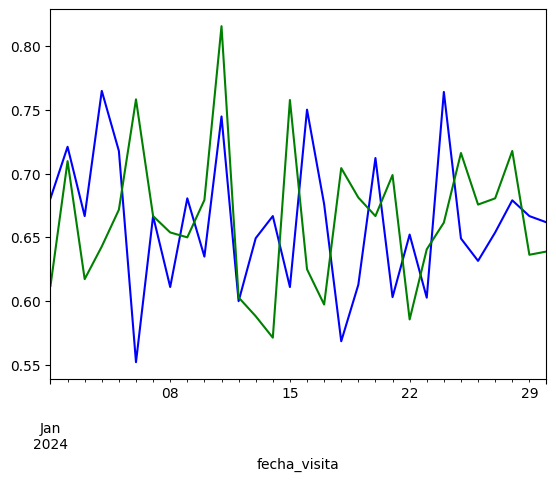

In [ ]:
control_agg.set_index('fecha_visita')['tasa_conversion'].plot(kind='line',color = 'blue')
tratamiento_agg.set_index('fecha_visita')['tasa_conversion'].plot(kind='line',color = 'green')

In [ ]:
alpha = 0.05

stat1, p_value_control  = stats.shapiro(control_agg['tasa_conversion'])
stat2, p_value_tratamiento  = stats.shapiro(tratamiento_agg['tasa_conversion'])

print(f"Shapiro-Wilk para Grupo 1: p-valor = {p_value_control:.4f}")
print(f"Shapiro-Wilk para Grupo 2: p-valor = {p_value_tratamiento:.4f}")

if p_value_control > alpha:
  print('La muestra de control es normal')
else:
  print('La muestra de control no es normal')

if p_value_tratamiento > alpha:
  print('La muestra de control es normal')
else:
  print('La muestra de control no es normal')

Shapiro-Wilk para Grupo 1: p-valor = 0.5099
Shapiro-Wilk para Grupo 2: p-valor = 0.4841
La muestra de control es normal
La muestra de control es normal


In [ ]:
if p_value_control > alpha and p_value_tratamiento > alpha:
    # Si ambos son normales, usamos t-Student
    t_stat, p_value = stats.ttest_ind(p_value_control, p_value_tratamiento)
    print(f"t-Student: p-valor = {p_value/2:.4f}")
else:
    # Si alguno no es normal, usamos Mann-Whitney
    mw_stat, p_value = stats.mannwhitneyu(p_value_control, p_value_tratamiento)
    print(f"Mann-Whitney U: p-valor = {p_value/2:.4f}")


if (p_value / 2 < alpha) and (tratamiento_agg['tasa_conversion'].mean() > control_agg['tasa_conversion'].mean()):
  print('Rechazamos la hipotesis nula: El verde mejora la tasa de conversión.')
else:
  print('No rechazamos la hipotesis nula: La tasa de conversión del verde es menor o igual a la del azul.')

t-Student: p-valor = nan
No rechazamos la hipotesis nula: La tasa de conversión del verde es menor o igual a la del azul.


/Volumes/Carlos Vallejo SSD/Triple Ten/tripleten-ds/ttds_venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6195: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
